<a href="https://colab.research.google.com/github/Junse0/class2021Fall/blob/main/nlp-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization   (단어를 쪼개 주는 것)

In [171]:
import nltk

In [172]:
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'
# 역 슬래쉬는 보기 좋게 끊어주는 것임 아무런 의미 없음
# text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. The ones who see things differently — they’re not fond of rules. \

In [ ]:
type(text)
print(type(text))
len(text)
print(len(text))
text[0:10]    #인덱싱 0부터 9까지(총 10개)
# [:10] 제일 처음부터 (0이 있으나 없으나 같음)
# [0:] 제일 끝까지이다
# [:] 전부 다
# [:-1] 제일 뒤(-1번째) 제외하고

In [ ]:
text.split()    # split은 일종의 함수   #형태를 그냥 암기 #class에는 variables 뿐만 아니라 함수도 포함됨
# space 기반으로 분류(space포함 안 함)
# type(text.split())  결과값: list

In [ ]:
' '.join(text.split()) #text.split()의 list를 glueing

# words = text.split()
# ' '.join(words)   # words의 list를 glueing
# 원상태로 복귀됨

In [173]:
#조금 더 유려하게 끊어주고자 tokenize (쉼표...)
from nltk.tokenize import word_tokenize  #word_tokenize
nltk.download('punkt')    # 미리 저장된 punktuation을 다운 #안 적으면 error
words = word_tokenize(text)
words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Here',
 '’',
 's',
 'to',
 'the',
 'crazy',
 'ones',
 ',',
 'the',
 'misfits',
 ',',
 'the',
 'rebels',
 ',',
 'the',
 'troublemakers',
 ',',
 'the',
 'round',
 'pegs',
 'in',
 'the',
 'square',
 'holes',
 '.',
 'The',
 'ones',
 'who',
 'see',
 'things',
 'differently',
 '—',
 'they',
 '’',
 're',
 'not',
 'fond',
 'of',
 'rules',
 '.',
 'You',
 'can',
 'quote',
 'them',
 ',',
 'disagree',
 'with',
 'them',
 ',',
 'glorify',
 'or',
 'vilify',
 'them',
 ',',
 'but',
 'the',
 'only',
 'thing',
 'you',
 'can',
 '’',
 't',
 'do',
 'is',
 'ignore',
 'them',
 'because',
 'they',
 'change',
 'things',
 '.',
 'They',
 'push',
 'the',
 'human',
 'race',
 'forward',
 ',',
 'and',
 'while',
 'some',
 'may',
 'see',
 'them',
 'as',
 'the',
 'crazy',
 'ones',
 ',',
 'we',
 'see',
 'genius',
 ',',
 'because',
 'the',
 'ones',
 'who',
 'are',
 'crazy',
 'enough',
 'to',
 'think',
 'that',
 'they',
 'can',
 'change',
 'the',
 'world',
 ',',
 'are',
 'the',
 'ones',
 'who',
 'do',
 '.']

In [141]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

### Normalization  (변이형들을 하나의 형태로)
Stemming: am → am, the going → the go, having → hav   (끊어줌)(동사 원형은 아님) 

Lemmatization: am → be, the going → the going, having → have   (사전에 등재된 원형으로)

In [ ]:
# PorterStemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()   # stemmer을 쓸 수 있게된 상태
[stemmer.stem(w) for w in words]    # words의 list들을 모두 stemming처리 후 다시 list로   # []:list 표시    
# ㄴ words에서 list 개수만큼 for loop를 돌려 w로 받음(for w in words), 이후 w가 stemmer.stem(w)에 들어가서 첫 번째 것이 됨
# ex. here이 w가 되어서 stemmer.stem(w)에 들어가 list 
# 그 다음 단어가.....

# list comprehension


In [ ]:
# PorterStemmer 연습
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()   # stemmer을 쓸 수 있게된 상태
stemmer.stem(words[0]) # words는 이미 tokenize됨(앞선 셀에서 이미 처리) # stemmer.trem('하나의 단어') #한 단어를 입력으로 받는다는 것이 중요!
print(stemmer.stem(words[0]))

# stemmer.stem('am')
# print(stemmer.stem('am'))   #결과값 am
# stemmer.stem('having')
# print(stemmer.stem('having'))   #결과값 have

In [ ]:
# LancasterStemmer
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
# WordNetLemmatizer (동사원형?)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword   (빈번한 단어는 고려하지 않음)

In [174]:
from nltk.corpus import stopwords  
nltk.download('stopwords')    # 다운로드 해야 됨(안 하면 error)
print(words)  # tokenize가 된 것 출력   # ['Here', '’', 's', 'to', 'the', 'crazy', 'ones', ',', 'the', 'misfits', ',', 'the'
words = [w for w in words if not w in stopwords.words('english')] # tokenize가 된 것에서 stopwords를 제외   # []: list comprehension
# words라는 list의 처음부터 끝까지 w로 받아 for loop로 돌리는데 (for w in words), 각 루프의 w(list의 하나하나 값)가 stopwods 속에 들어 있지 않으면(if not w in stopwords.words('english')) list up 해라([]))
print(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Here', '’', 's', 'to', 'the', 'crazy', 'ones', ',', 'the', 'misfits', ',', 'the', 'rebels', ',', 'the', 'troublemakers', ',', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes', '.', 'The', 'ones', 'who', 'see', 'things', 'differently', '—', 'they', '’', 're', 'not', 'fond', 'of', 'rules', '.', 'You', 'can', 'quote', 'them', ',', 'disagree', 'with', 'them', ',', 'glorify', 'or', 'vilify', 'them', ',', 'but', 'the', 'only', 'thing', 'you', 'can', '’', 't', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things', '.', 'They', 'push', 'the', 'human', 'race', 'forward', ',', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones', ',', 'we', 'see', 'genius', ',', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world', ',', 'are', 'the', 'ones', 'who', 'do', '.']
['Here',

In [ ]:
# stopwords 예문
from nltk.corpus import stopwords  
nltk.download('stopwords') 
stopwords.words('english')

### Collocation, Concordance   (어떤 두 단어의 연쇄를 봄/ 예문 검색)

In [ ]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

In [ ]:
nltk.Text(words).collocations()

In [ ]:
nltk.Text(words).concordance('Emma', 79, 10)

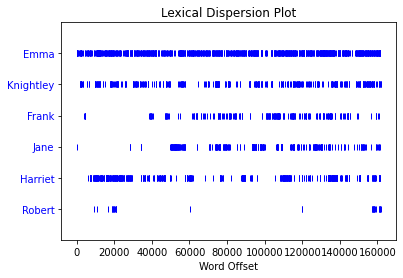

In [151]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [152]:
nltk.Text(words).similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [153]:
nltk.Text(words).common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


### Frequency distribution, Frequency plot   (단어의 빈도수 체크) 

In [154]:
fd = nltk.FreqDist(words).most_common(20)
fd

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301)]

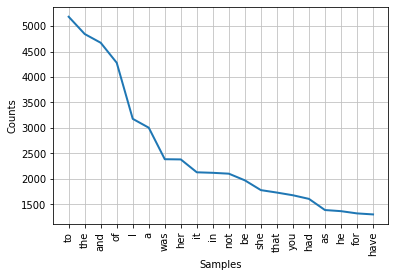

In [155]:
nltk.Text(words).plot(20)

### Dictionary   (말 그대로 dictionary)

In [ ]:
nltk.download('words')    # 꼭 다운 받아야(안 하면 error)
nltk.corpus.words.words('en')[-20:-1]   #nltk.corpus.words.words('en')자체가 list이기 때문에 바로 [-20:-1]을 붙여도 됨

In [ ]:
nltk.download('words')
a = nltk.corpus.words.words('en')[-20:-1]
type(a)
print(type(a))
len(a)
print(len(a))   # 결과값 235886개의 표제어가 사용됨
a[:20]    # 0부터 19까지
a[-20:]   # 끝에서 부터 20번째
a[-20:-1] # a[-20:]에서 제일 끝의 것 뺌

In [ ]:
len(nltk.corpus.words.words('en'))

### Regular expression   ('정규표현'-생각한 규칙을 텍스트에 적용)  (자연어/텍스트 처리의 기본) (한 str에 대해서)

ex.

단어 철자의 두 번째가 r이고 다섯 번째가 t인 것

단어 모음이 2개인 것을 찾아라

In [158]:
import re

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [179]:
word = 'supercalifragilisticexpialidocious'
re.search('[aeiou]li', word)    #re.search():re(regular expression)에 있는 search(function)을 사용    #[aeiou]li: 규칙-찾을 대상 ex. ali, eli, ili, oli, uli    #가장 먼저 나오는 것만 찾음
#결과값 <re.Match object; span=(6, 9), match='ali'> 7번째(6번째 다음)부터 9번째까지

<re.Match object; span=(6, 9), match='ali'>

In [180]:
#예문
word = 'supercalifragilisticexpialidocious'
re.search('.li', word)

<re.Match object; span=(6, 9), match='ali'>

In [ ]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

In [161]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

# result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
['Ahmed', 'Alfred', 'Arided', 'Christed', 'Confed', 'Daneweed', 'Eldred', 'Eskimoized', 'Fred', 'Ged']


### Extract information (pos tag, named entity)   

pos(part of speech) tagging: 품사를 tagging해줌

In [162]:
sent = "I am Jhon from America and would like to go to Starbucks"
words = nltk.word_tokenize(sent)

In [163]:
'''
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent's
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
'''

'\nPOS tag list:\n\nCC\tcoordinating conjunction\nCD\tcardinal digit\nDT\tdeterminer\nEX\texistential there (like: "there is" ... think of it like "there exists")\nFW\tforeign word\nIN\tpreposition/subordinating conjunction\nJJ\tadjective\t\'big\'\nJJR\tadjective, comparative\t\'bigger\'\nJJS\tadjective, superlative\t\'biggest\'\nLS\tlist marker\t1)\nMD\tmodal\tcould, will\nNN\tnoun, singular \'desk\'\nNNS\tnoun plural\t\'desks\'\nNNP\tproper noun, singular\t\'Harrison\'\nNNPS\tproper noun, plural\t\'Americans\'\nPDT\tpredeterminer\t\'all the kids\'\nPOS\tpossessive ending\tparent\'s\nPRP\tpersonal pronoun\tI, he, she\nPRP$\tpossessive pronoun\tmy, his, hers\nRB\tadverb\tvery, silently,\nRBR\tadverb, comparative\tbetter\nRBS\tadverb, superlative\tbest\nRP\tparticle\tgive up\nTO\tto\tgo \'to\' the store.\nUH\tinterjection\terrrrrrrrm\nVB\tverb, base form\ttake\nVBD\tverb, past tense\ttook\nVBG\tverb, gerund/present participle\ttaking\nVBN\tverb, past participle\ttaken\nVBP\tverb, sing. 

In [164]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [165]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


### Wordcloud

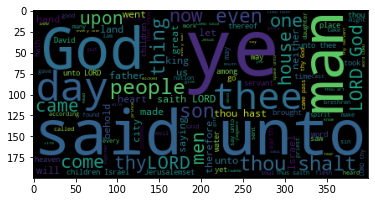

In [166]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

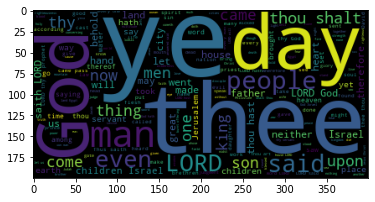

In [167]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)